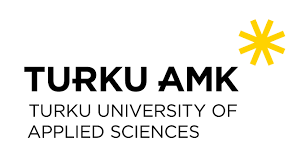        Created by Golnaz Sahebi, Introduction to Data Engineering, Autumn 2025

---    


# Hands-on 02: Data Wrangling with the Heart Disease UCI Dataset

**Data wrangling**, also known as data munging, is the process of cleaning, transforming, and organizing raw data into a structured and usable format for analysis. It involves tasks such as handling missing values, correcting data types, filtering, merging, and creating new features to prepare the data for further analysis or machine learning models. The goal of data wrangling is to make the data more consistent, accurate, and ready for meaningful insights.

## Description: 
In this exercise, we will work with the Heart Disease dataset from the UCI Machine Learning Repository. The goal is to perform data wrangling tasks, including handling missing values, creating new features, analyzing the data, and saving the cleaned data for future use.

## Dataset Overview:
The Heart Disease dataset contains 14 attributes and is used to predict the presence of heart disease in patients. The 

attributes include:

- **age:** Age of the patient
- **sex:** Gender of the patient (1 = male, 0 = female)
- **cp:** Chest pain type (0 to 3)
- **trestbps:** Resting blood pressure (in mm Hg)
- **chol:** Serum cholesterol in mg/dl
- **fbs:** Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- **restecg:** Resting electrocardiographic results (0 to 2)
- **thalach:** Maximum heart rate achieved
- **exang:** Exercise-induced angina (1 = yes; 0 = no)
- **oldpeak:** ST depression induced by exercise relative to rest
- **slope:** The slope of the peak exercise ST segment
- **ca:** Number of major vessels (0–3) colored by fluoroscopy
- **thal:** Thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect)
- **target:** Diagnosis of heart disease (1 = disease present, 0 = no disease)

## Steps:

### 1. Load the Dataset:

- Load the Heart Disease dataset from a URL into a Pandas DataFrame 

### 2. Inspect the Dataset:

- Display the first few rows to understand the data structure.
- Identify missing values, if any.

### 3. Handle Missing Values:

- Fill the missing values with the **mode**.

**Note:** The dataset contains missing values represented by a **'?'**. We'll replace these values with **NaN** (Not a Number) and handle missing values in specific columns by replacing them with the mode (most frequent value).

### 4. Create New Columns:

- Create a new column called **cholesterol_level**, where values are classified as:
    - High if chol > 240
    - Borderline if 200 < chol ≤ 240
    - Normal if chol ≤ 200

- Create a new column called **age_group** to group patients into categories like:
    - Young (age < 40)
    - Middle-aged (40 ≤ age < 60)
    - Senior (age ≥ 60)

- Analyze the Data:
    - Calculate the **average cholesterol levels** by gender and age group.
    - Find the **number of patients with heart disease** in each age group.

- Export the Cleaned Data:
    - Write the cleaned and transformed data to a new CSV file.
    









In [3]:
# Import necessary libraries
import pandas as pd

# Step 1: Load the Dataset from the URL with defining the column names as the dataset doesn’t have headers.
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df = pd.read_csv(url, names = columns)

# Show the first few rows to verify the data
print(df.head())
print()
print(df.info())

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-

In [6]:
# Check for missing values

print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [8]:
# Step 3: Handle Missing Values

# Replace missing values denoted by '?' with NaN (Pandas' standard missing value representation) 

df.replace('?', pd.NA, inplace = True)
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


In [11]:
# Convert 'ca' and 'thal' columns to numeric (their type is still as object/text since they had '?' values initially, or any number-like strings (e.g., "3.0") be available)
# Without the pd.to_numeric step, your columns would remain as text, and any attempt to calculate the median or mean would fail with a TypeError.
# errors='coerce' is an instruction that tells Pandas what to do if it encounters a value it cannot convert into a number: it will force the problematic value to become NaN (Not a Number).

df['ca'] = pd.to_numeric(df['ca'], errors = 'coerce')
df['thal'] = pd.to_numeric(df['thal'], errors = 'coerce')
                            
print("Data type of 'ca':", df['ca'].dtype)
print("Data type of 'thal':", df['thal'].dtype)

# Now check again for missing values after '?' replacement

print(df.isnull().sum())

print("Data type of 'ca':", df['ca'].dtype)
print("Data type of 'thal':", df['thal'].dtype)

Data type of 'ca': float64
Data type of 'thal': float64
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64
Data type of 'ca': float64
Data type of 'thal': float64


In [13]:
# Fill missing values for 'ca' and 'thal' with the mode (most frequent value)
df['ca'].fillna(df['ca'].mode()[0], inplace = True)
df['thal'].fillna(df['thal'].mode()[0], inplace = True)

# Check for any remaining missing values
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


C:\Users\eddie\AppData\Local\Temp\ipykernel_22728\4096841489.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ca'].fillna(df['ca'].mode()[0], inplace = True)
C:\Users\eddie\AppData\Local\Temp\ipykernel_22728\4096841489.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [17]:
# Step 4: Create New Columns
# Create a new column 'cholesterol_level' based on the 'chol' value

# Initialize the new column with a default value (e.g., 'Normal')
df['cholesterol_level'] = 'Normal'

# Update the column for 'Borderline' cases
df.loc[df['chol'] > 200 & (df['chol'] <= 240), 'cholesterol_level'] = 'Border;ine'

# Update the column for 'High' cases
df.loc[df['chol'] > 240, 'cholesterol_level'] = 'High'

# Display the DataFrame to verify the new column
print(df[['chol', 'cholesterol_level']].head())

    chol cholesterol_level
0  233.0        Border;ine
1  286.0              High
2  229.0        Border;ine
3  250.0              High
4  204.0        Border;ine


In [21]:
# Another way to create new columns and assign new values
# Create a new column 'age_group' to categorize patients into age groups

def age_group(age):
    if age < 40:
        return 'Young'
    elif 40 <= age < 60:
        return 'Middle-aged'
    else:
        return 'Senior'

# Apply the function to create the new column

df['age_group'] = df['age'].apply(age_group)
df['age_group']

0           Senior
1           Senior
2           Senior
3            Young
4      Middle-aged
          ...     
298    Middle-aged
299         Senior
300    Middle-aged
301    Middle-aged
302          Young
Name: age_group, Length: 303, dtype: object

In [26]:
# Step 5: Analyze the Data
# Calculate average cholesterol levels by gender and age group

avg_chol_by_gender_age = df.groupby(['sex', 'age_group'])['chol'].mean().reset_index()
print(f"Average cholesterol levels by genders and age groups: {avg_chol_by_gender_age}")


Average cholesterol levels by genders and age groups:    sex    age_group        chol
0  0.0  Middle-aged  257.188679
1  0.0       Senior  275.179487
2  0.0        Young  205.400000
3  1.0  Middle-aged  238.041667
4  1.0       Senior  246.653846
5  1.0        Young  225.400000


In [27]:
# Find the number of patients with heart disease (target = 1) in each age group

heart_disease_by_age = df[df['target'] == 1].groupby('age_group')['target'].count().reset_index()
print(f"Number of patients with heart disease in each group: {heart_disease_by_age}")

Number of patients with heart disease in each group:      age_group  target
0  Middle-aged      35
1       Senior      18
2        Young       2


In [30]:
# Step 6: Export the Cleaned Data
# Write the cleaned and transformed data to a new CSV file

df.to_csv('cleaned_heart_disease_data.csv', index = False)


In [31]:
# Print a message to indicate successful completion

print("Succesful completion!")

Succesful completion!
